<a href="https://colab.research.google.com/github/meetmeet10/Netlfix_Movies_Tv_shows/blob/main/Solution_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

There were approximately 7787 records and 11 attributes in the dataset.

We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Netflix is a streaming service that offers a wide variety of television shows and movies for viewers to watch at their convenience. With a monthly subscription, users have access to a vast library of content, including original series and films produced by Netflix. The platform also allows users to create multiple profiles, making it easy for family members or roommates to have their own personalized viewing experience. Additionally, Netflix allows users to download content to watch offline, making it a great option for those who travel frequently or have limited internet access. Overall, Netflix is a convenient and cost-effective way to access a wide variety of entertainment.

As of 2022-Q2, more than 220 million people had signed up for Netflix's online streaming service, making it the largest OTT provider worldwide. To improve the user experience and prevent subscriber churn, they must efficiently cluster the shows hosted on their platform.

By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing manipulation Libraries
import pandas as pd
import numpy as np
import regex as re
# importing visualizing libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/alma better/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
netflix = df.copy()

### Dataset First View

In [ ]:
# Dataset First Look
# datset top 5 rows
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# last 5 rows
netflix.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
shape = netflix.shape
print(f'in our dataset there are {shape[0]} rows and {shape[1]} columns')

in our dataset there are 7787 rows and 12 columns


### Dataset Information

In [ ]:
# Dataset Info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
null_percentage = netflix.isnull().sum()
percentage = (null_percentage / shape[0]) * 100
percentage

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

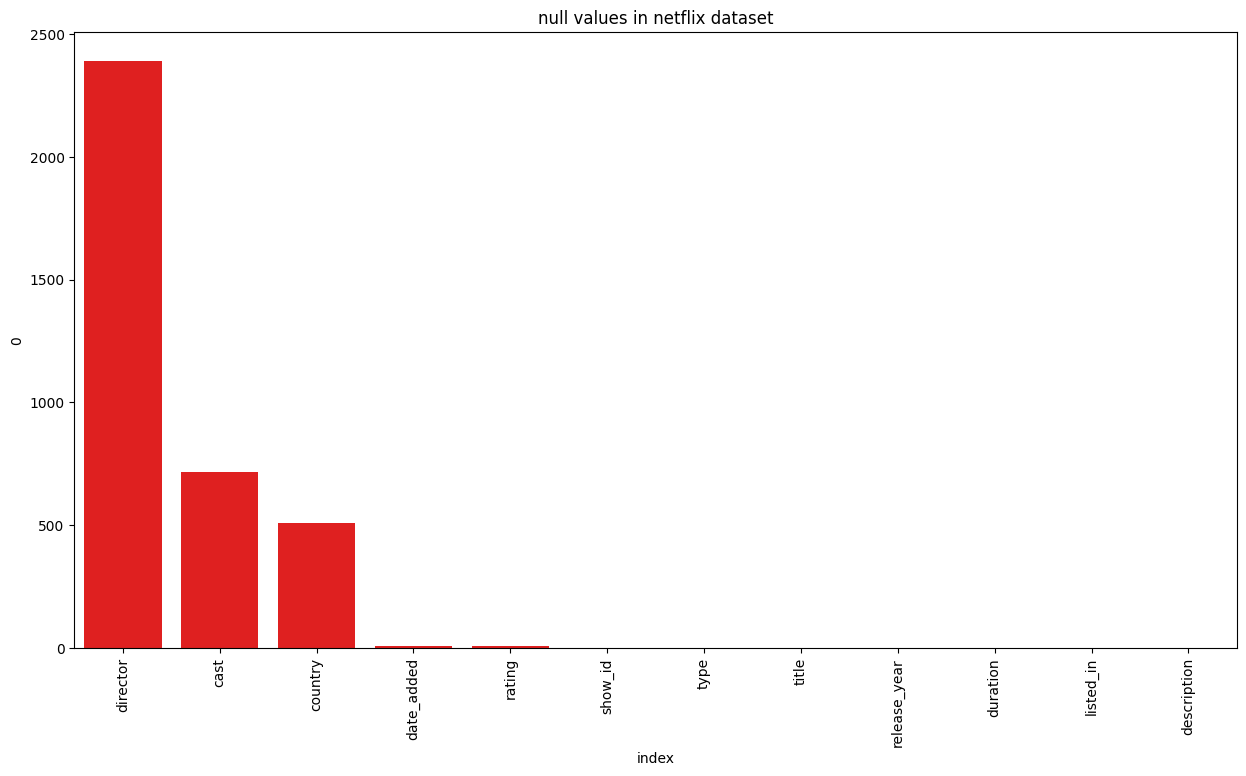

In [ ]:
# Visualizing the missing values
plt.figure(figsize = (15,8))
null_df = netflix.isnull().sum().sort_values(ascending = False).reset_index()
null_df
sns.barplot(data = null_df, x = null_df['index'], y = null_df[0], color = 'red')
plt.title("null values in netflix dataset")
plt.xticks(rotation = 90)
plt.show()

### What did you know about your dataset?

there are 12 columns and 7787 rows where in columns like director, cast, country, date_added, rating has some null values also there are no duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
columns = list(netflix.columns)
print("these are the columns present in our dataset ")
print(columns)

these are the columns present in our dataset 
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Dataset Describe
netflix.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

show_id - unique id for every movie/ tv show

type - identifier - a movie or a tv show

title - title of the movie/ tv show

director - director of the show

cast - actors involved

country - country of production

date_added - date it was added on netflix

release_year - actual release year of the show

rating - tv rating of the show

duration - total duration in minutes or number of seasons

listed_in - genre

description - the summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
netflix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
for column in columns:
  print("unique variables in this column")

  print(netflix[column].unique())

unique variables in this column
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
unique variables in this column
['TV Show' 'Movie']
unique variables in this column
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
unique variables in this column
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
unique variables in this column
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
unique variables

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
netflix_df = netflix.copy()

In [ ]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
def removing_comma(date):
  return date.replace(',', '')

In [ ]:
netflix_df['date_added'] = netflix_df['date_added'].astype(str)

In [ ]:
netflix_df['date_added'] = netflix_df['date_added'].apply(removing_comma)

In [ ]:
def removing_space(dates):
  return dates.replace(" ", "")

In [ ]:
netflix_df['date_added'] = netflix_df['date_added'].apply(removing_space)

In [ ]:
from datetime import datetime
def conv_to_date(d):
  if d == 'nan':
    return pd.NaT
  else:
    return datetime.strptime(d, '%B%d%Y')

In [ ]:
netflix_df['date_added'] = netflix_df['date_added'].apply(conv_to_date)

In [ ]:
def extract_year(d):
  return d.year

In [ ]:
netflix_df['added_year'] = netflix_df['date_added'].apply(extract_year)

### What all manipulations have you done and insights you found?

Removed all the null values from our dataset.Converted date_added column which earlier was object datatype into a datetime datatype.Then we extract year from from date_added column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Which country contribute the most content?

In [ ]:
#visualization code
country_content = netflix_df.groupby(by = 'country')['type'].count().reset_index(name = 'content type').sort_values(by = 'content type',ascending = False)
c = country_content.head(10)
c

country  content type
549   United States          2555
229           India           923
462  United Kingdom           397
291           Japan           226
394     South Korea           183
51           Canada           177
403           Spain           134
147          France           115
137           Egypt           101
308          Mexico           100

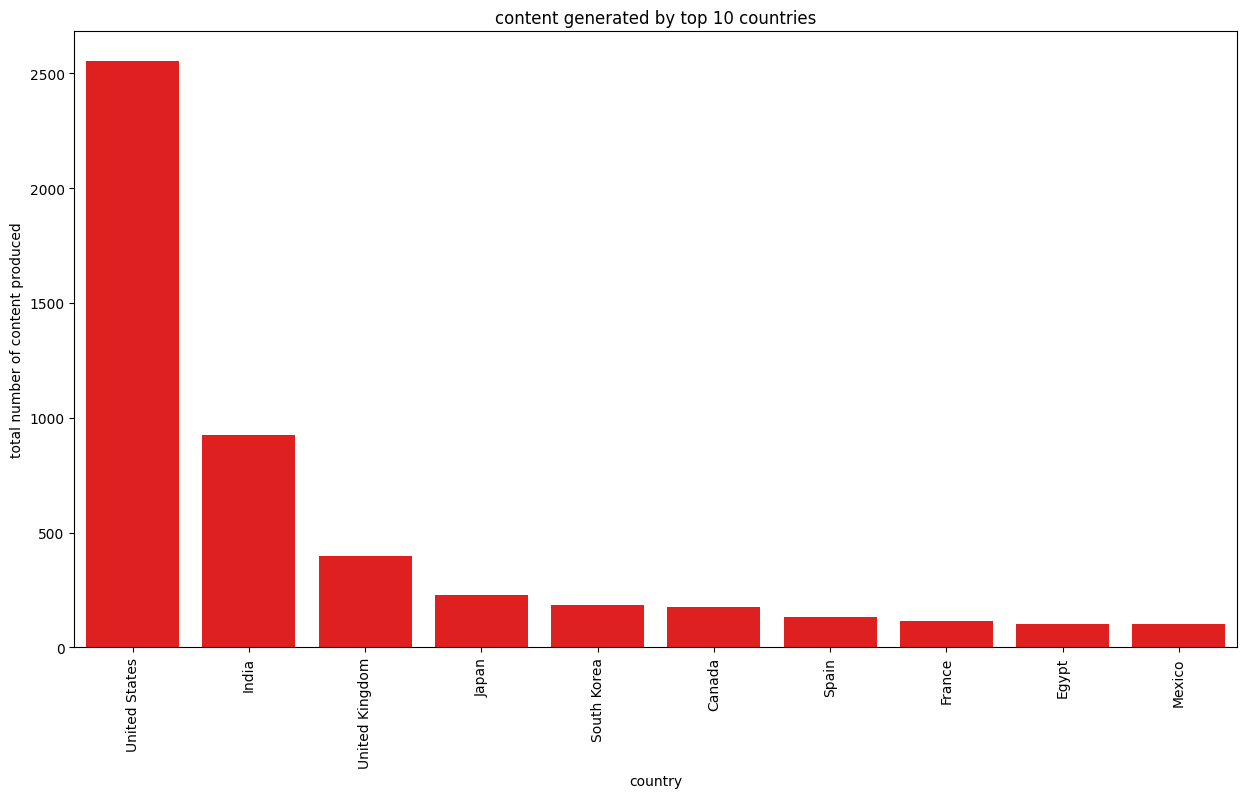

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(data = c, x = 'country', y = 'content type', color = 'red')
plt.xlabel('country')
plt.ylabel('total number of content produced')
plt.title('content generated by top 10 countries')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Which content more in netflix?

In [ ]:
# data preparation code
content = netflix_df['type'].value_counts()

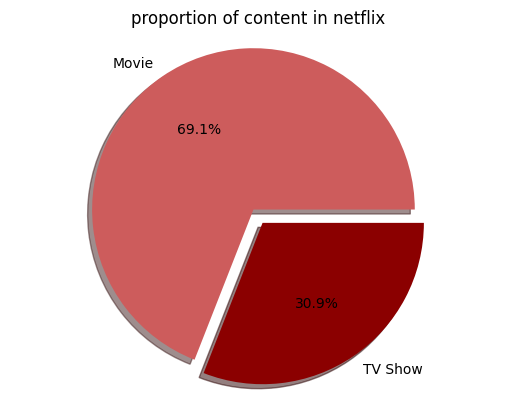

In [ ]:
#visualization code
plt.pie(x = content.values, labels = content.index, autopct = '%1.1f%%', explode = [0,0.1], shadow = True, colors = ['indianred', 'darkred'])
plt.axis('equal')
plt.title('proportion of content in netflix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Relationship between director and rating

In [ ]:
# data preparation code
relation = netflix_df.groupby(by = ['director', 'rating'])['rating'].count().reset_index(name = 'count').sort_values(by = "count", ascending = False)
relation_df = relation.head(10)
relation_df

director rating  count
3470  Raúl Campos, Jan Suter  TV-MA     17
2605            Marcus Raboy  TV-MA     13
1805             Jay Chapman  TV-MA     10
1810               Jay Karas  TV-MA     10
3368       Quentin Tarantino      R      8
2680         Martin Scorsese      R      8
2334          Kunle Afolayan  TV-14      7
2357             Lance Bangs  TV-MA      7
3887         Shannon Hartman  TV-MA      7
4521         Youssef Chahine  TV-MA      7

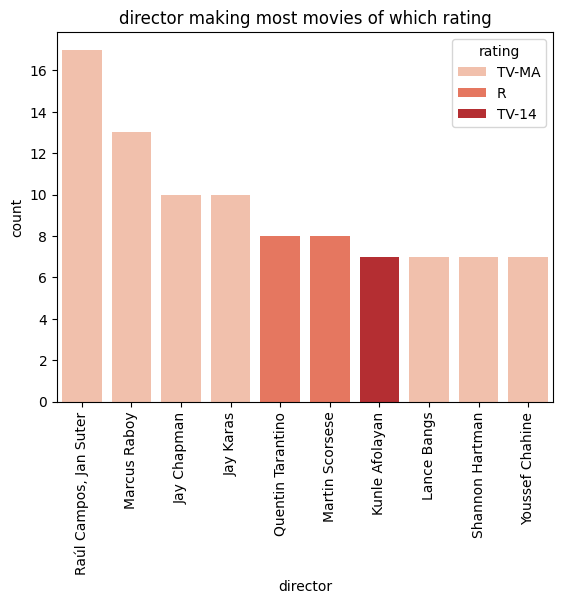

In [ ]:
#visualization code
red_shades = ["#FF0000", "#FF4500", "#FF8C00", "#FFD700"]
sns.barplot(x = relation_df['director'], y = relation_df['count'], hue = relation_df['rating'], palette = 'Reds')
plt.xticks(rotation = 90)
plt.title('director making most movies of which rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Which genre is more preferred in movies?

In [ ]:
#data preparation
genre = netflix_df.groupby('listed_in')['listed_in'].count().sort_values(ascending = False)
famous_genre = genre.head(10).reset_index(name = 'count')

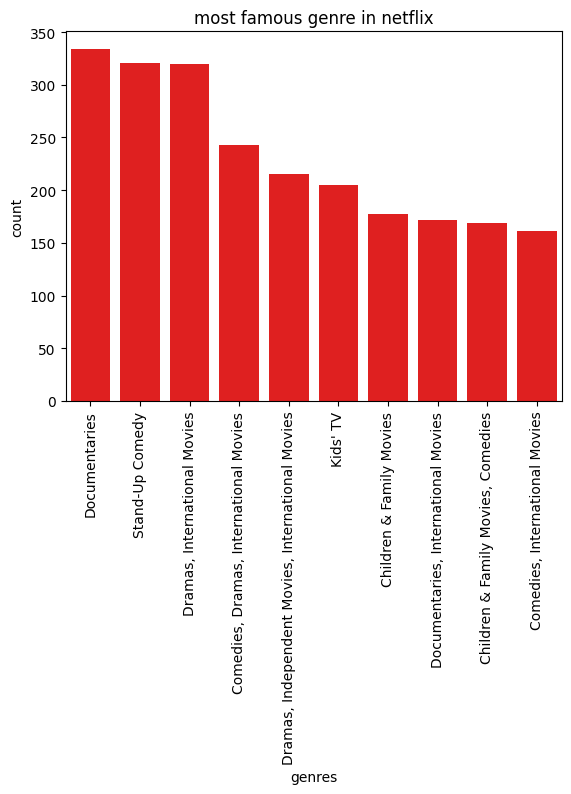

In [ ]:
# visualization code
sns.barplot(x = famous_genre['listed_in'], y = famous_genre['count'], data = famous_genre, color = 'red')
plt.xticks(rotation = 90)
plt.title('most famous genre in netflix')
plt.xlabel('genres')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Top 10 directors across movies

In [ ]:
# data preparation code
movies_df = netflix_df.loc[netflix.loc[:, 'type'] == 'Movie']
dir_movie = movies_df.groupby('director')['type'].count().sort_values(ascending = False)
dir_movies = dir_movie.head(10).reset_index(name = 'movies count')
dir_movies

director  movies count
0  Raúl Campos, Jan Suter            18
1            Marcus Raboy            15
2               Jay Karas            14
3     Cathy Garcia-Molina            13
4         Youssef Chahine            12
5         Martin Scorsese            12
6             Jay Chapman            12
7        Steven Spielberg            10
8            David Dhawan             9
9         Shannon Hartman             8

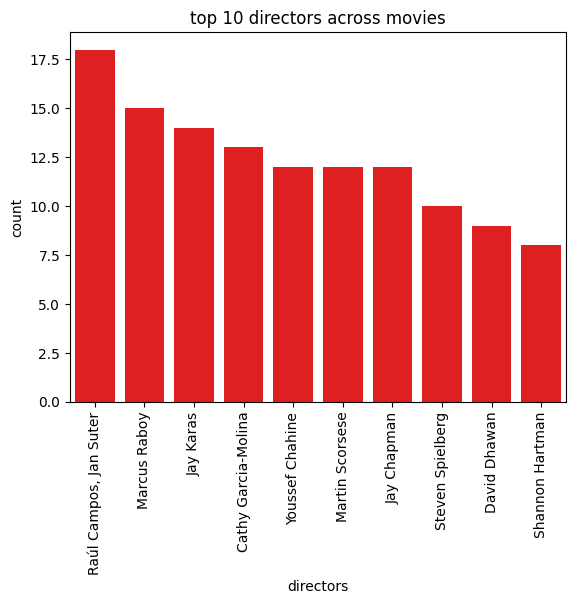

In [ ]:
#visualization code
sns.barplot(data = dir_movies, x = dir_movies['director'], y = dir_movies['movies count'], color = 'red')
plt.xticks(rotation = 90)
plt.title('top 10 directors across movies')
plt.xlabel('directors')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Top 10 most directors across tv shows

In [ ]:
# data preparation code
tv_df = netflix_df.loc[netflix_df.loc[:, 'type'] == 'TV Show']
dir_tv = tv_df.groupby('director')['type'].count().sort_values(ascending = False)
dir_tvs = dir_tv.head(10).reset_index(name = 'shows count')
dir_tvs

director  shows count
0                      Alastair Fothergill            3
1                          Rob Seidenglanz            2
2                                Ken Burns            2
3                              Shin Won-ho            2
4                           Iginio Straffi            2
5                              Stan Lathan            2
6  Pantham Thongsang, Cheewatan Pusitsuksa            1
7                               Pali Yahya            1
8                             Miguel Conde            1
9                       Neslihan Yesilyurt            1

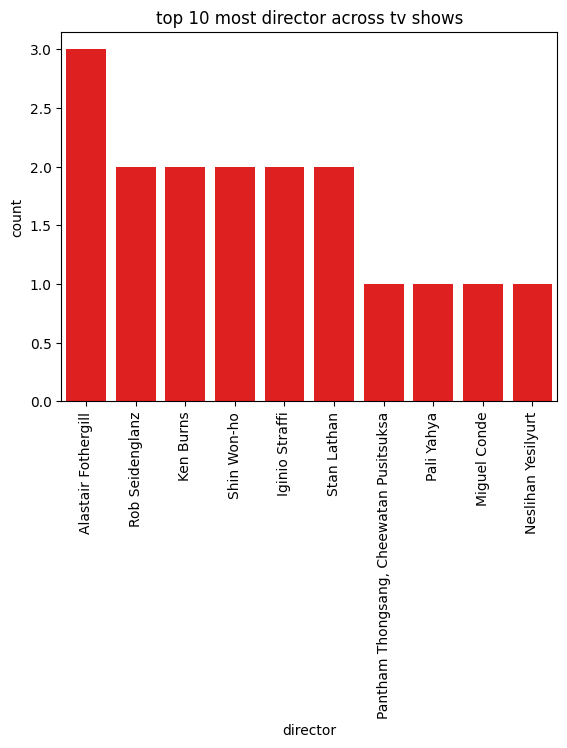

In [ ]:
#visualization code
sns.barplot(x = dir_tvs['director'], y = dir_tvs['shows count'], data = dir_tvs, color = 'red')
plt.title('top 10 most director across tv shows')
plt.xlabel('director')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# count of each rating

In [ ]:
popular = netflix_df.groupby('rating')['rating'].count()
popular_ratings = popular.reset_index(name = 'ratings_count').sort_values(by = 'ratings_count', ascending = False)
popular_ratings

rating  ratings_count
8      TV-MA           2863
6      TV-14           1931
9      TV-PG            806
5          R            665
4      PG-13            386
10      TV-Y            280
11     TV-Y7            271
3         PG            247
7       TV-G            194
2         NR             84
0          G             39
12  TV-Y7-FV              6
13        UR              5
1      NC-17              3

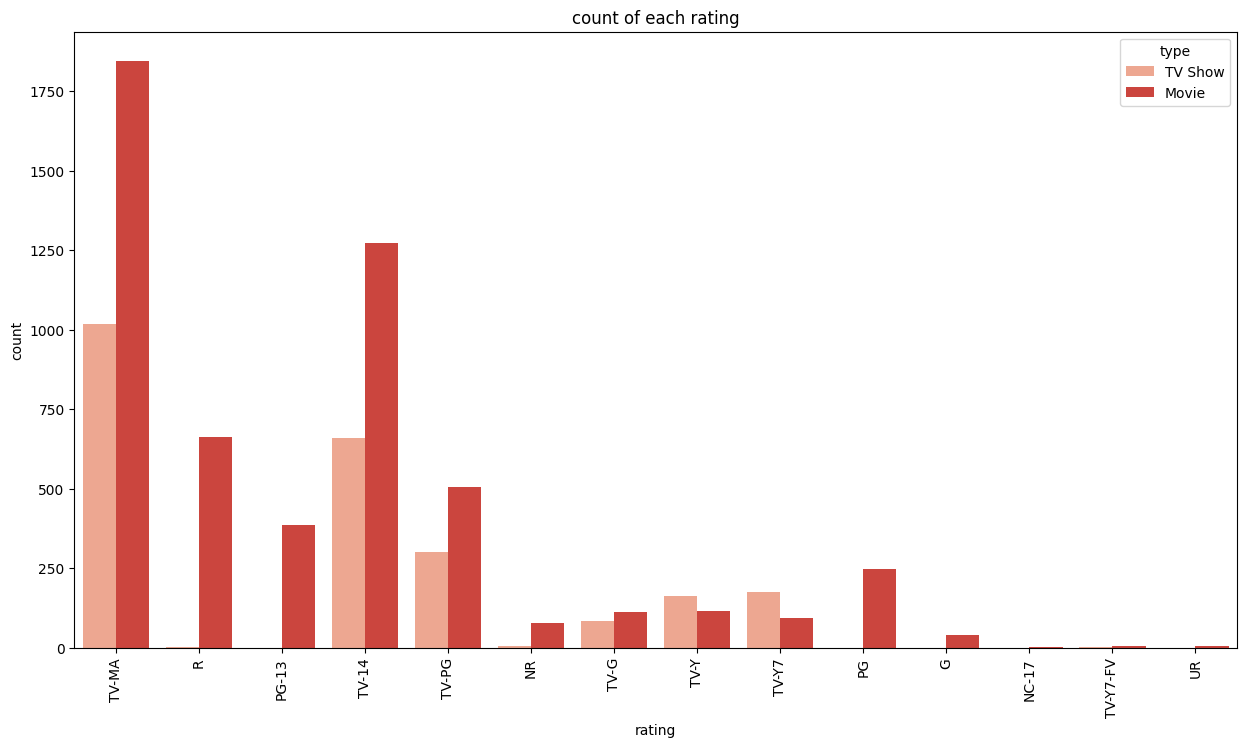

In [ ]:
#visualization code
plt.figure(figsize = (15,8))
sns.countplot(x = netflix_df['rating'], hue = netflix_df['type'], palette = 'Reds')
plt.title('count of each rating')
plt.xlabel('rating')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Number of contents added per year

In [ ]:
# data preparation code
year_wise_content = netflix_df.groupby('added_year')['added_year'].count().reset_index(name = 'content count')

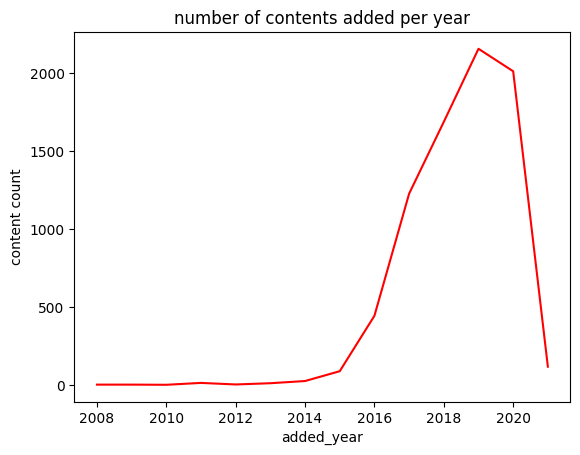

In [ ]:
#visualization code
sns.lineplot(data = year_wise_content, x = year_wise_content['added_year'], y= year_wise_content['content count'], color ='red')
plt.title('number of contents added per year')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# common duration for tv shows

In [ ]:
# data preparation code
duration = tv_df.groupby('duration')['duration'].count().reset_index(name = 'duration count').sort_values(by = 'duration count', ascending = False)
duration

duration  duration count
0     1 Season            1608
7    2 Seasons             382
8    3 Seasons             184
9    4 Seasons              87
10   5 Seasons              58
11   6 Seasons              30
12   7 Seasons              19
13   8 Seasons              18
14   9 Seasons               8
1   10 Seasons               6
2   11 Seasons               3
3   12 Seasons               2
4   13 Seasons               2
5   15 Seasons               2
6   16 Seasons               1

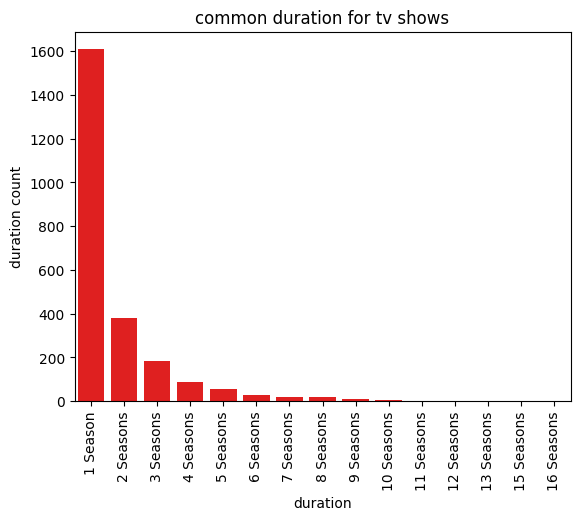

In [ ]:
# visualization code
sns.barplot(data = duration , x = duration['duration'], y = duration['duration count'], color = 'red')
plt.title('common duration for tv shows')
plt.xlabel('duration')
plt.ylabel('duration count')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Distribution of duration in movies

In [ ]:
def removing_space_min(d):
  return d.replace(' min', '')

In [ ]:
# data preparation code
duration_movies = movies_df['duration'].reset_index()
duration_movies['duration'] = duration_movies['duration'].astype(str).apply(removing_space_min)
duration_movies['duration'] = duration_movies['duration'].astype(int)

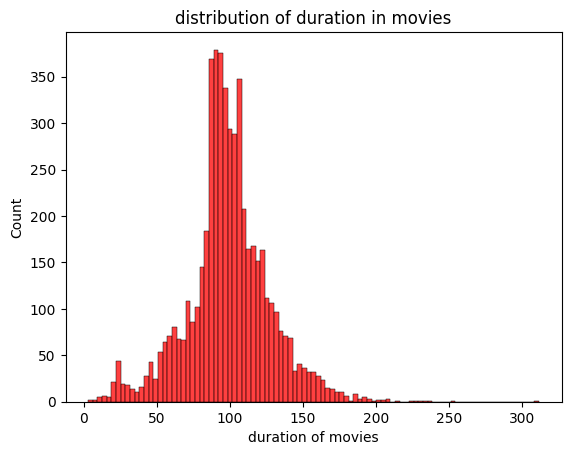

In [ ]:
#visualization code
sns.histplot(data = duration_movies['duration'] ,color = 'red')
plt.xlabel('duration of movies')
plt.title('distribution of duration in movies')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

chart - 11

In [ ]:
# visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
tv = tv_df['added_year'].value_counts().reset_index()
tv = tv.rename(columns ={'index': 'year', 'added_year': 'count'})
tv['expected_count'] = tv['count'] * 3


In [ ]:
tv = tv.sort_values(by = 'year').reset_index(drop = True)

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy import stats

# Assuming you have a pandas DataFrame named netflix_data with columns "Year" and "Number_of_TV_Shows"
# Load your dataset here
# For demonstration purposes, let's assume your dataset is already loaded

# Compute the expected number of TV shows in each year after 2013

# Iterate over each year and perform hypothesis test
alpha = 0.05
for year in tv['year']:
    tv_shows_year = tv.loc[tv['year'] == year,'count']
    expected_tv_shows_year = tv.loc[tv['year'] == year, 'expected_count']

    # Perform Hypothesis Test
    t_statistic, p_value = stats.ttest_1samp([tv_shows_year], expected_tv_shows_year)

    # Interpret Results
    if p_value < alpha:
        print(f"Reject the null hypothesis for {year}. The number of TV shows on Netflix has not tripled since 2013.")
    else:
        print(f"Fail to reject the null hypothesis for {year}. The number of TV shows on Netflix has nearly tripled since 2013.")

Fail to reject the null hypothesis for 2008.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2013.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2014.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2015.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2016.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2017.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2018.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2019.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2020.0. The number of TV shows on Netflix has nearly tripled sinc

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
ratings = {'TV-Y': 'Kids','TV-G': 'Kids','G': 'Kids',
           'TV-PG': 'Older Kids','TV-Y7-FV': 'Older Kids','TV-Y7': 'Older Kids','PG': 'Older Kids',
           'TV-14': 'Teens','PG-13': 'Teens',
           'TV-MA': 'Adults','R': 'Adults','NR': 'Adults','UR': 'Adults','NC-17': 'Adults'}
df_copy = netflix_df.copy()
df_copy['target_ages'] = df_copy['rating'].replace(ratings)
df_copy['type'] = pd.Categorical(df_copy['type'])
df_copy['target_ages'] = pd.Categorical(df_copy['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

data = data = df_copy.groupby("target_ages")["target_ages"].count().reset_index(name="count")
hypo_df = pd.DataFrame(data)

# Extract counts of Teens and total counts
teens_count = hypo_df.loc[hypo_df['target_ages'] == 'Adults', 'count'].values[0]
total_count = hypo_df['count'].sum()

# Null hypothesis proportion
null_proportion = 0.5

# Perform one-sample proportion test
z_stat, p_val = proportions_ztest(teens_count, total_count, value=null_proportion, alternative='two-sided')

# Output results
print("Z-statistic:", z_stat)
print("P-value:", p_val)
if p_val < 0.05:  # Assuming a significance level of 0.05
    print("Reject null hypothesis: The category 'Adults' content is not equal to 50% of content")
else:
    print("Fail to reject null hypothesis: The 50% of content present in Netflix is of category 'Adults' content.")

Z-statistic: -6.136950383415187
P-value: 8.412064428161871e-10
Reject null hypothesis: The category 'Adults' content is not equal to 50% of content


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
significance_value = 0.05
hypo_data = pd.crosstab(netflix_df['type'], netflix_df['added_year'], margins=False)
hypo_data

# year_added	2008	2009	2010	2011	2012	2013	2014	2015	2016	2017	2018	2019	2020	2021
# type
# Movie	1	2	1	13	3	6	19	58	256	861	1255	1497	1312	88
# TV Show	1	0	0	0	0	5	6	30	184	361	429	656	697	29

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

if p < significance_value:
  print("we will reject null hypothesis")
else:
  print("Failed to reject")


we will reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
added_year        10
dtype: int64


<Axes: >

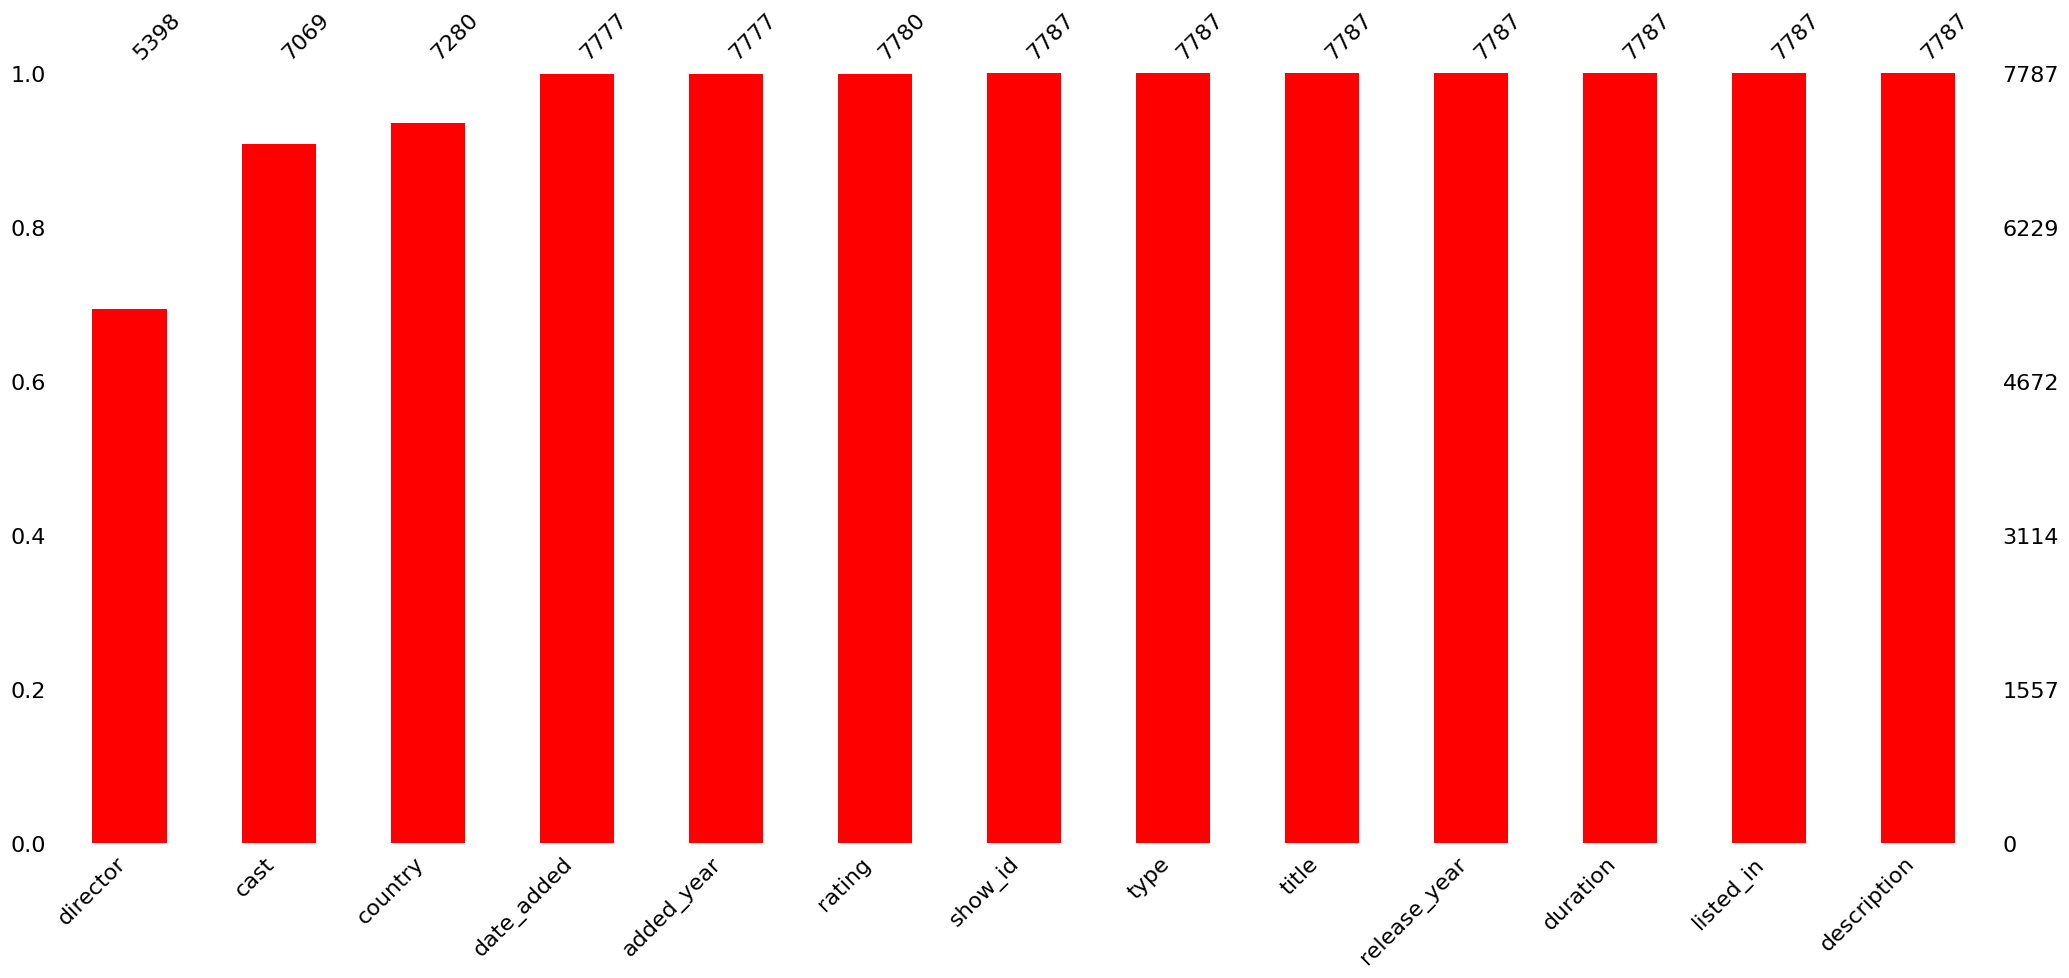

In [ ]:
import missingno as msno
msno.bar(netflix_df, color = 'red', sort = 'ascending')

In [ ]:
net_flix = netflix.dropna()

In [ ]:
net_flix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
net_flix['date_added'] = pd.to_datetime(net_flix['date_added'])

In [ ]:
net_flix['added_year'] = net_flix['date_added'].apply(extract_year)

In [ ]:
net_flix['added_month'] = net_flix['date_added'].dt.month_name()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

<Axes: ylabel='Density'>

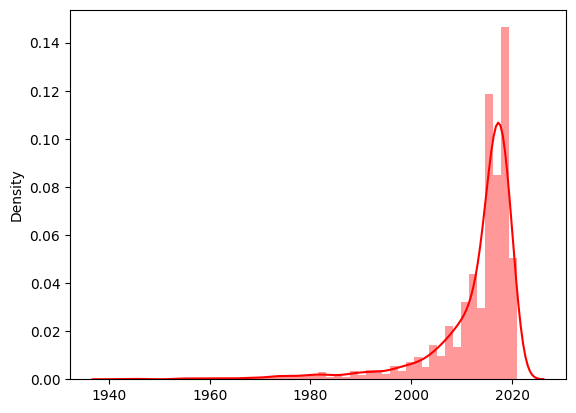

In [ ]:
# Handling Outliers & Outlier treatments
sns.distplot(x = net_flix['release_year'], color = 'red')

<Axes: >

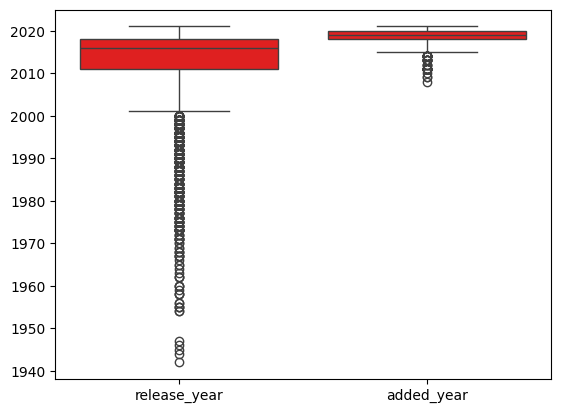

In [ ]:
sns.boxplot(data = net_flix, color = 'red')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
# Encode your categorical columns
one_hot_encoder = ce.OneHotEncoder()
type_encoder_df = one_hot_encoder.fit_transform(net_flix['type'])
print('one-hot encoding for type of content')
print(type_encoder_df)

one-hot encoding for type of content
      type_1  type_2
1          1       0
2          1       0
3          1       0
4          1       0
5          0       1
...      ...     ...
7778       1       0
7780       1       0
7781       1       0
7782       1       0
7783       1       0

[4808 rows x 2 columns]


In [ ]:
one_hot_encoder1 = ce.OneHotEncoder()
rating_encoder_df = one_hot_encoder1.fit_transform(net_flix['rating'])
print("one-hot-encoding for rating")
print(rating_encoder_df)

one-hot-encoding for rating
      rating_1  rating_2  rating_3  rating_4  rating_5  rating_6  rating_7  \
1            1         0         0         0         0         0         0   
2            0         1         0         0         0         0         0   
3            0         0         1         0         0         0         0   
4            0         0         1         0         0         0         0   
5            1         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
7778         0         1         0         0         0         0         0   
7780         1         0         0         0         0         0         0   
7781         0         0         0         0         0         0         0   
7782         1         0         0         0         0         0         0   
7783         0         0         0         1         0         0         0   

      rating_8  rating_9  rating_10

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### 1. Expand Contraction

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
def expand_contractions_in_text(text):
    expanded_sentences = []
    for sentence in text.split('.'):
        expanded_sentence = contractions.fix(sentence)
        expanded_sentences.append(expanded_sentence)
    return '.'.join(expanded_sentences)

In [ ]:
net_flix['expanded'] = net_flix['description'].apply(expand_contractions_in_text)

In [ ]:
net_flix['text'] = net_flix['expanded'] + net_flix['cast'] + net_flix['country'] + net_flix['director'] + net_flix['listed_in'] + net_flix['rating']

In [ ]:
net_flix['text'][1]

'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen BeatoMexicoJorge Michel GrauDramas, International MoviesTV-MA'

#### 2. Lower Casing and removing stopwords and removing white spaces

In [ ]:
stop_words = stopwords.words('english')
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Lower Casing,removing stop words and white spaces
def lower_case(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text)

In [ ]:
net_flix['text'] = net_flix['text'].apply(lower_case)

In [ ]:
net_flix['text'][1]

'devastating earthquake hits mexico city, trapped survivors walks life wait rescued trying desperately stay alive.demián bichir, héctor bonilla, oscar serrano, azalia ortiz, octavio michel, carmen beatomexicojorge michel graudramas, international moviestv-ma'

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
  import string
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

In [ ]:
net_flix['text'] = net_flix['text'].apply(remove_punctuation)

In [ ]:
net_flix['text'][1]

'devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alivedemián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beatomexicojorge michel graudramas international moviestvma'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# there are no urls and words that have digits present in the dataset.

#### 5. Tokenization

In [ ]:
net_flix['text'] = net_flix['text'].astype(str)

In [ ]:
# Tokenization
tokenizer = TweetTokenizer()
def tokenizing(words):
  return tokenizer.tokenize(words)

In [ ]:
net_flix['text'] = net_flix['text'].apply(tokenizing)

#### 6. Text Normalization

##### Which text normalization technique have you used and why?

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Lemmatization
def lemmatize_verbs(words):
   lemmatizer = WordNetLemmatizer()
   lemmas = []
   for word in words:
    lemma = lemmatizer.lemmatize(word)
    lemmas.append(lemma)
   return ' '.join(lemmas)

In [ ]:
net_flix['text'] = net_flix['text'].apply(lemmatize_verbs)

In [ ]:
net_flix['text'][1]

'devastating earthquake hit mexico city trapped survivor walk life wait rescued trying desperately stay alivedemián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beatomexicojorge michel graudramas international moviestvma'

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

Answer Here.

#### 9. Part of speech tagging

#### 10. Text Vectorization

In [ ]:
def identity_tokenizer(text):
  return word_tokenize(text)

In [ ]:
# Vectorizing Text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer,stop_words = "english", lowercase = False, max_features = 10000)
tfidf.fit(net_flix['text'])
dictionary = tfidf.vocabulary_.items()

In [ ]:
print(len(dictionary))

10000


In [ ]:
vector = tfidf.transform(net_flix['text']).toarray()
print(vector)
print(f'shape of the vector {vector.shape}')
print(f'data type : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector (4808, 10000)
data type : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# there is only one integer column in our dataset and the other columns are of object datatype so feature manipulation is not required.

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Instead of feature selection we preferred using dimensionality reduction

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
# our only integer column is already normally distributed so we don't require data scaling.

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
pca = PCA(random_state = 42)
pca.fit(vector)

PCA(random_state=42)

In [ ]:
print(pca)

PCA(random_state=42)


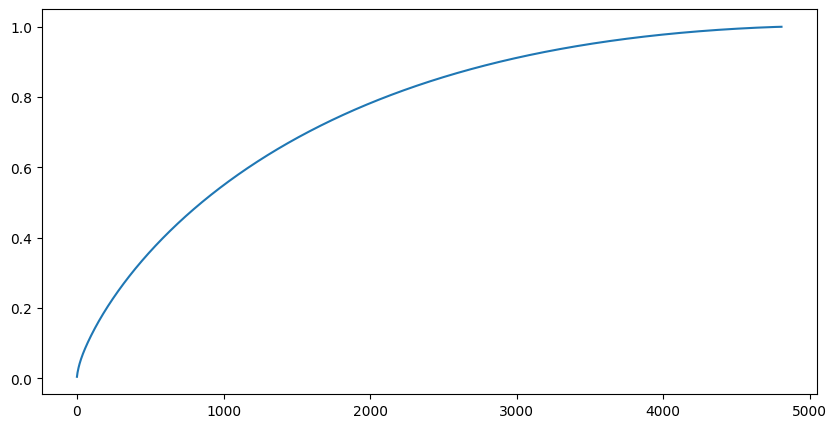

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
print(pca.explained_variance_ratio_)

[4.69035940e-03 3.52710265e-03 3.28028700e-03 ... 9.25575103e-34
 4.40895859e-35 3.84427755e-35]


In [ ]:
pca = PCA(n_components=4000,random_state=42)
pca.fit(vector)

PCA(n_components=4000, random_state=42)

In [ ]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(4808, 4000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# as its a clustering model so we don't have to split our data.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

So most of our columns are of object datatype and the one column which is integer is already normally distributed or balanced so we don't have to handle it.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# as there is only one integer column which is already in correct proportion so we don't have to handle imbalanced data.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
X

array([[-0.00287046,  0.00673724, -0.00702606, ..., -0.0098398 ,
         0.00672141,  0.00462235],
       [-0.0210206 , -0.0310808 ,  0.01926812, ...,  0.00320771,
        -0.01054088, -0.00757808],
       [-0.09427361, -0.08036968,  0.01407442, ...,  0.00993979,
        -0.00718533, -0.00451786],
       ...,
       [-0.07033882, -0.04106016, -0.00567622, ..., -0.00204389,
        -0.00439213,  0.00147452],
       [-0.02107602, -0.04629653,  0.00968325, ...,  0.00967616,
        -0.00352721,  0.00853552],
       [ 0.0685414 ,  0.00334886, -0.01869574, ...,  0.00644212,
         0.00260485,  0.00038379]])

In [ ]:
# importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### ML Model - 1

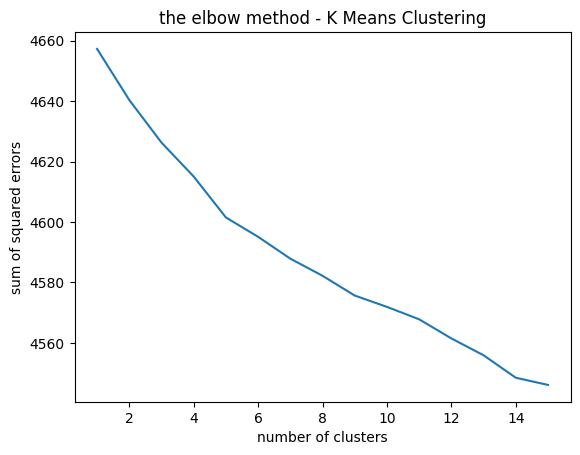

In [ ]:
# ML Model - 1 Implementation
sse = []
for k in range(1,16):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)
plt.plot(range(1,16), sse)
plt.title('the elbow method - K Means Clustering')
plt.xlabel('number of clusters')
plt.ylabel('sum of squared errors')
plt.show()

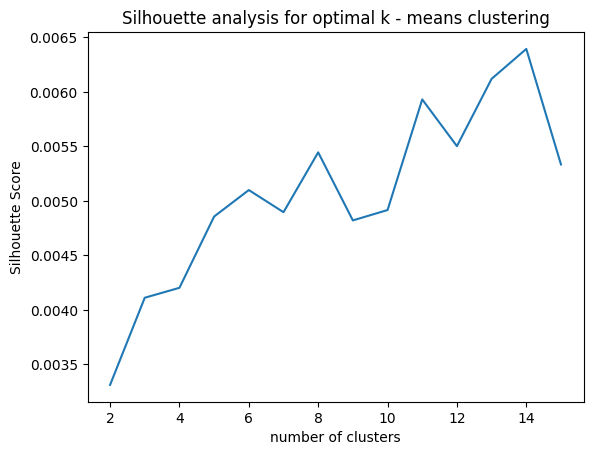

In [ ]:
sil_avg = []
for k in range(2,16):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  labels = kmeans.labels_
  score = silhouette_score(X, labels)
  sil_avg.append(score)
plt.plot(range(2,16), sil_avg)
plt.xlabel('number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis for optimal k - means clustering')
plt.show()

The optimal number of clusters is 5

In [ ]:
# building 5 clusters using the k-means clustering algorithm
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 33)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=33)

In [ ]:
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)
print((kmeans_distortion, kmeans_silhouette_score))

(4601.51056950589, 0.00487625433908651)


In [ ]:
net_flix['kmeans_cluster'] = kmeans.labels_

In [ ]:
net_flix.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

type                             title          director  \
7118  TV Show                       To the Lake  Pavel Kostomarov   
6201    Movie               The Case for Christ          Jon Gunn   
4150    Movie                  Mission of Honor       David Blair   
1461    Movie                 Colkatay Columbus    Saurav Palodhi   
4797  TV Show  Patton Oswalt: I Love Everything      Marcus Raboy   

                                                   cast  \
7118  Viktoriya Isakova, Kirill Käro, Aleksandr Roba...   
6201  Mike Vogel, Erika Christensen, Faye Dunaway, R...   
4150  Iwan Rheon, Milo Gibson, Stefanie Martini, Mar...   
1461  Mir Afsar Ali, Gaurav Chakrabarty, Tanusree Ch...   
4797                           Patton Oswalt, Bob Rubin   

                     country rating  \
7118                  Russia  TV-MA   
6201           United States  TV-PG   
4150  United Kingdom, Poland  TV-MA   
1461                   India  TV-14   
4797           United States  TV-MA   

                                            listed_in  \
7118  International TV Shows, TV Dramas, TV Mysteries   
6201                     Dramas, Faith & Spirituality   
4150                       Action & Adventure, Dramas   
1461             Comedies, Dramas, Independent Movies   
4797        Stand-Up Comedy & Talk Shows, TV Comedies   

                                            description  kmeans_cluster  
7118  Facing the end of civilization when a terrifyi...               0  
6201  Bothered by his wife's unyielding belief in Ch...               3  
4150  As Hitler's Nazis threaten to take command of ...               3  
1461  When Christopher Columbus mysteriously appears...               1  
4797  Turning 50. Finding love again. Buying a house...               0

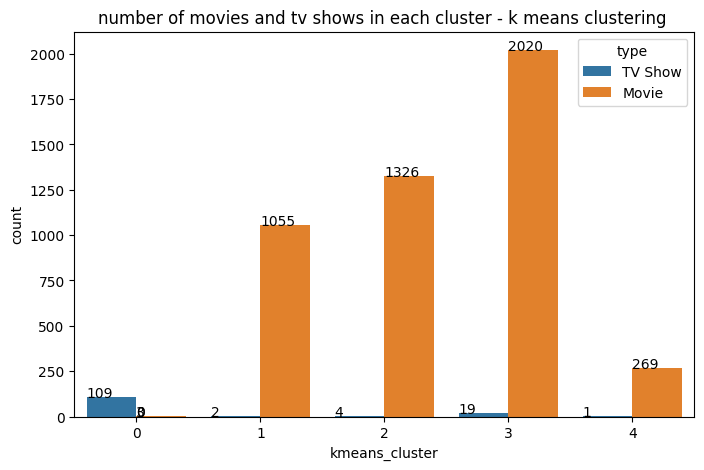

In [ ]:
# number of movies and tv shows in each cluster
plt.figure(figsize = (8,5))
graph = sns.countplot(x='kmeans_cluster', data = net_flix, hue = 'type')
plt.title('number of movies and tv shows in each cluster - k means clustering ')
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

# Building wordclouds for different clusters in k-means clustering

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def kmeans_wordcloud(cluster_number, column_name):
  netflix_df_wordcloud = net_flix[['kmeans_cluster', column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[netflix_df_wordcloud['kmeans_cluster'] == cluster_number]

  text = " ".join(word for word in netflix_df_wordcloud[column_name])
  wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'white').generate(text)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

word cloud on title for different cluster
cluster0


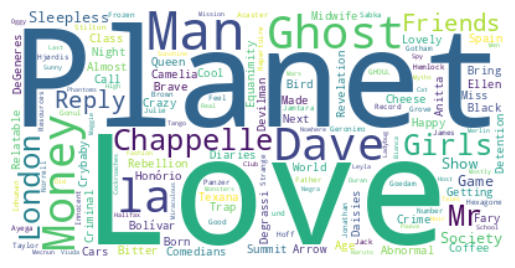


cluster1


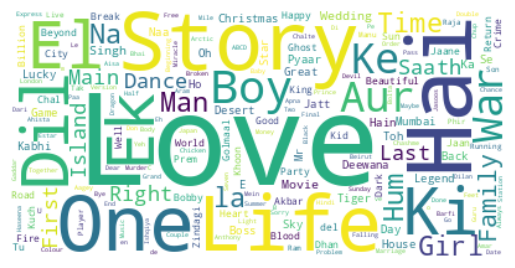


cluster2


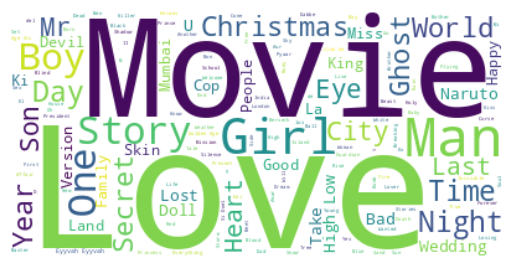


cluster3


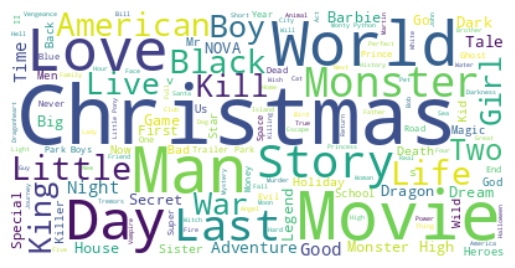


cluster4


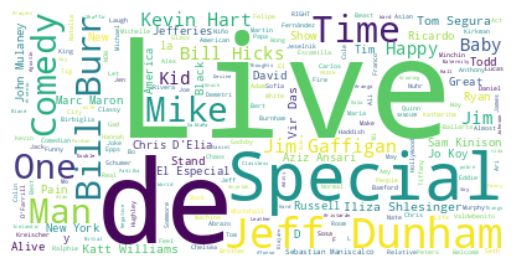


word cloud on listed_in for different cluster
cluster0


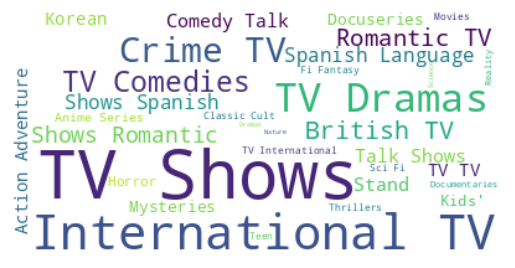


cluster1


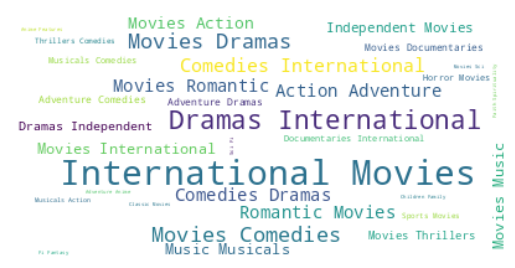


cluster2


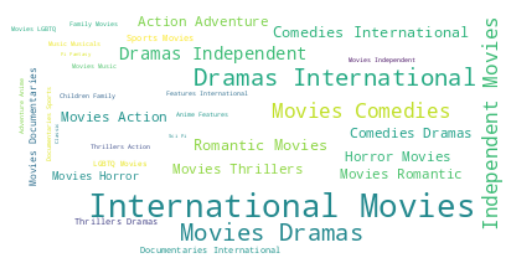


cluster3


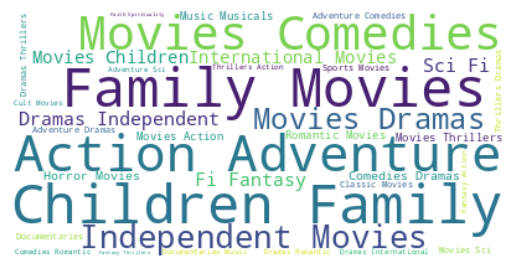


cluster4


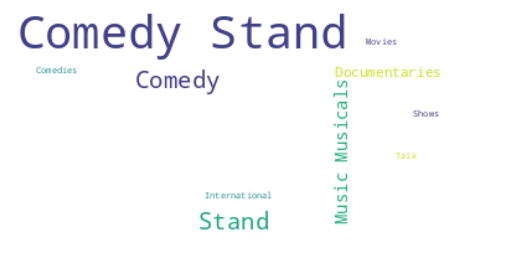


word cloud on cast for different cluster
cluster0


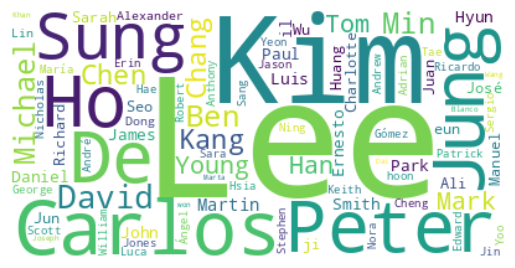


cluster1


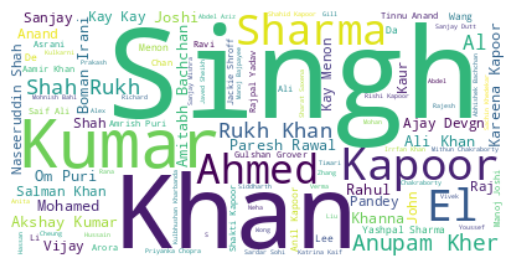


cluster2


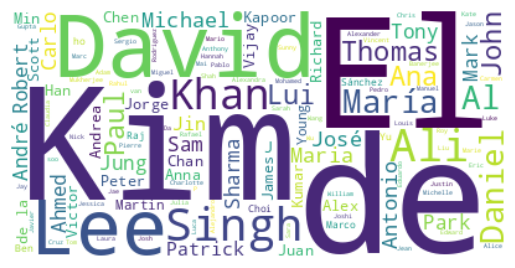


cluster3


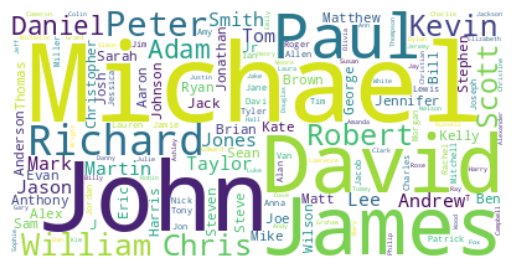


cluster4


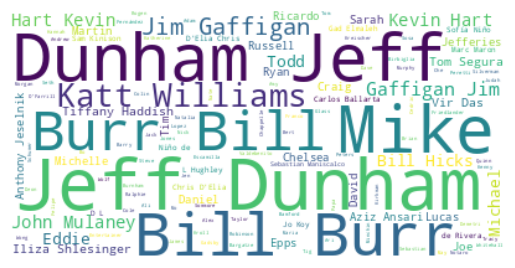


word cloud on country for different cluster
cluster0


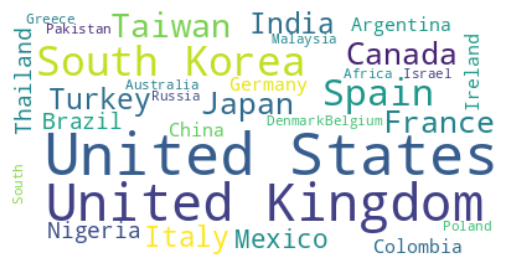


cluster1


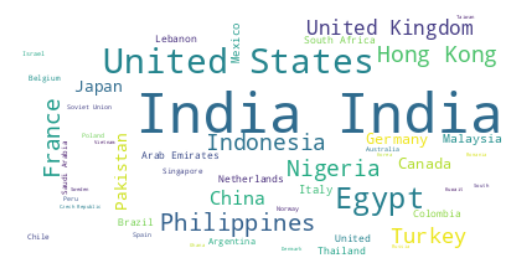


cluster2


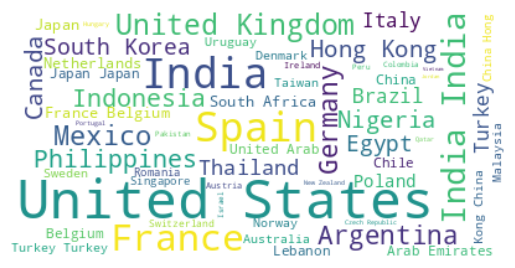


cluster3


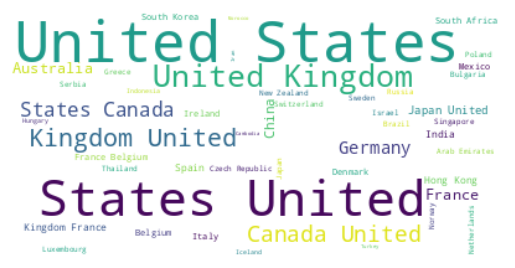


cluster4


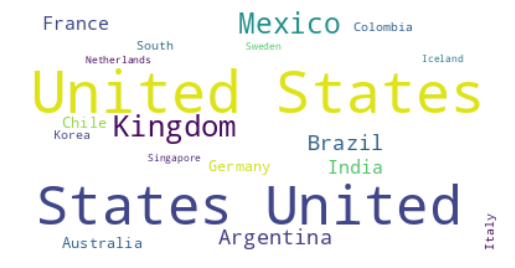


word cloud on director for different cluster
cluster0


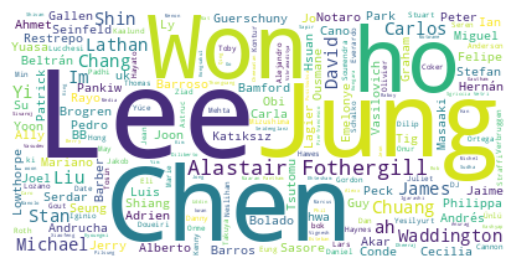


cluster1


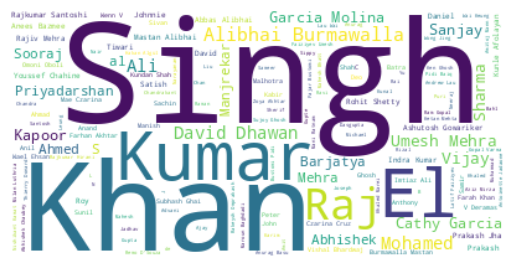


cluster2


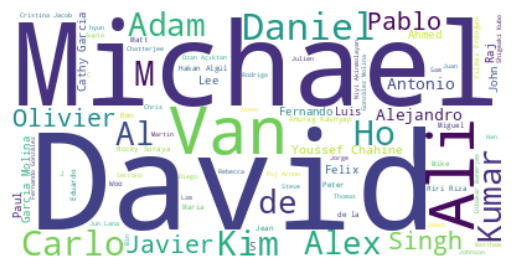


cluster3


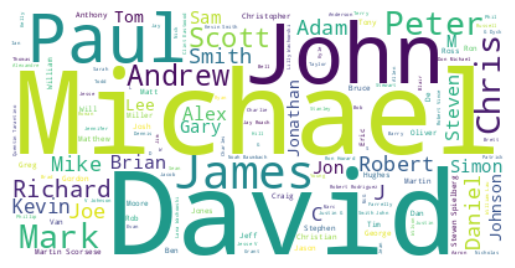


cluster4


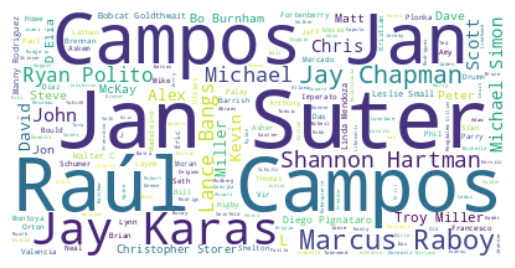

In [ ]:
lst = ['title','listed_in', 'cast','country','director']
for l in lst:
  print(f'word cloud on {l} for different cluster')
  for i in range(5):
    print(f'cluster{i}')
    kmeans_wordcloud(i, l)
    print()

### ML Model - 2

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

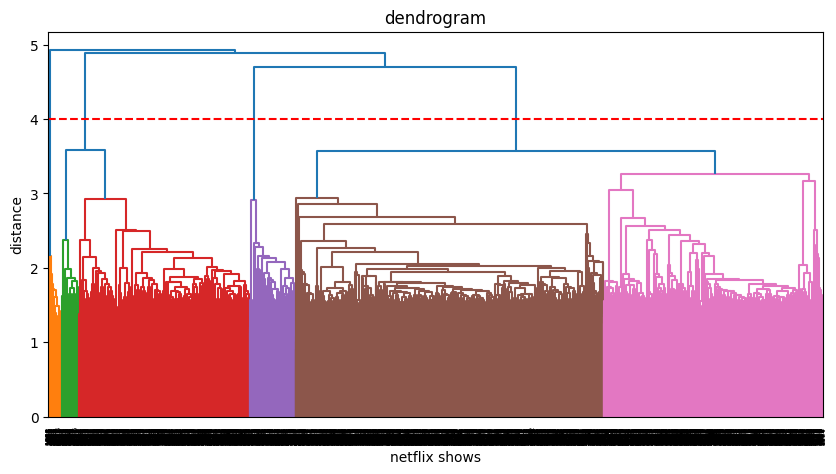

In [ ]:
plt.figure(figsize = (10,5))
dend = shc.dendrogram(shc.linkage(X, method = 'ward'))
plt.title('dendrogram')
plt.xlabel('netflix shows')
plt.ylabel('distance')
plt.axhline(y = 4, color = 'r', linestyle ='--')

In [ ]:
# fitting hierarchical clustering model
h = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
h.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 2])

In [ ]:
net_flix['hierarchical_cluster'] = h.labels_

In [ ]:
net_flix.sample(5)[['type','title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description','hierarchical_cluster']]

type               title                                     director  \
6933  Movie         The Tourist             Florian Henckel von Donnersmarck   
1325  Movie      Chicken Little                                  Mark Dindal   
6216  Movie     The Chosen Ones                                 David Pablos   
6333  Movie  The Endless Trench  Aitor Arregi, Jon Garaño, Jose Mari Goenaga   
5242  Movie           Rock On!!                              Abhishek Kapoor   

                                                   cast  \
6933  Angelina Jolie, Johnny Depp, Paul Bettany, Tim...   
1325  Zach Braff, Joan Cusack, Patrick Stewart, Stev...   
6216  Nancy Talamantes, Óscar Torres, Leidi Gutiérre...   
6333  Antonio de la Torre, Belén Cuesta, Vicente Ver...   
5242  Farhan Akhtar, Arjun Rampal, Purab Kohli, Luke...   

                                           country rating  \
6933  United States, France, Italy, United Kingdom  PG-13   
1325                                 United States      G   
6216                                Mexico, France  TV-MA   
6333                         Spain, France, Canada  TV-MA   
5242                                         India  TV-14   

                                             listed_in  \
6933               Action & Adventure, Romantic Movies   
1325                Children & Family Movies, Comedies   
6216  Dramas, Independent Movies, International Movies   
6333  Dramas, Independent Movies, International Movies   
5242    Dramas, International Movies, Music & Musicals   

                                            description  hierarchical_cluster  
6933  An American tourist seeking solace for his sha...                     0  
1325  No one believes Chicken Little when he tries t...                     0  
6216  Young Ulises falls in love with teen Sofia, ev...                     0  
6333  Fearing retribution, a Republican from the Spa...                     0  
5242  Four friends hoped that their rock band would ...                     2

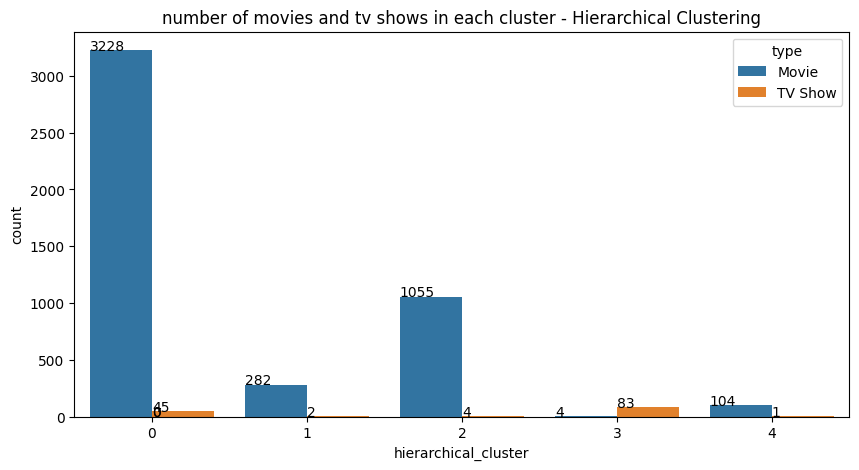

In [ ]:
plt.figure(figsize=(10,5))
graph = sns.countplot(x = 'hierarchical_cluster', data = net_flix, hue = 'type')
plt.title('number of movies and tv shows in each cluster - Hierarchical Clustering')
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))


In [ ]:
from wordcloud import WordCloud, STOPWORDS
def h_word_cloud(cluster_number, column_name):
  wordcloud = net_flix[['hierarchical_cluster', column_name]].dropna()
  wordcloud = wordcloud[wordcloud['hierarchical_cluster'] == cluster_number]

  text = " ".join(word for word in wordcloud[column_name])
  cloud = WordCloud(stopwords = set(STOPWORDS), background_color= 'white').generate(text)

  plt.imshow(cloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

word cloud on title for different cluster
cluster0


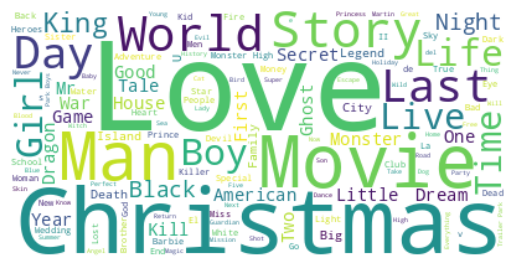


cluster1


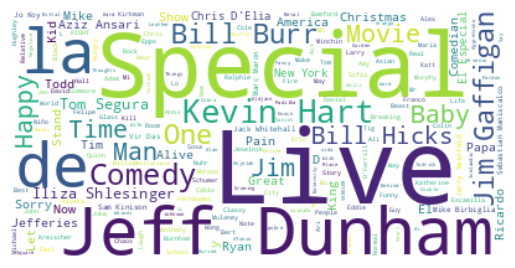


cluster2


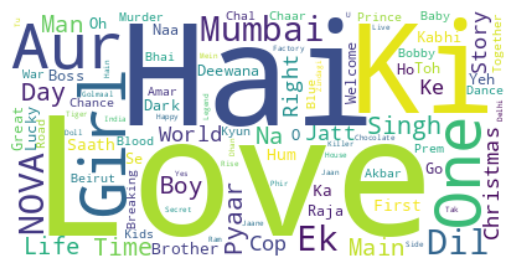


cluster3


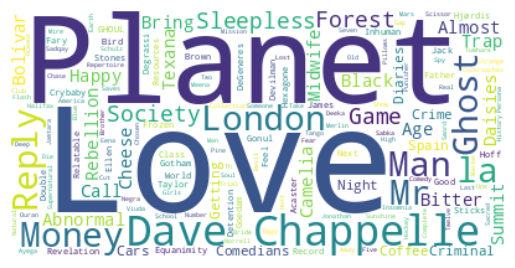


cluster4


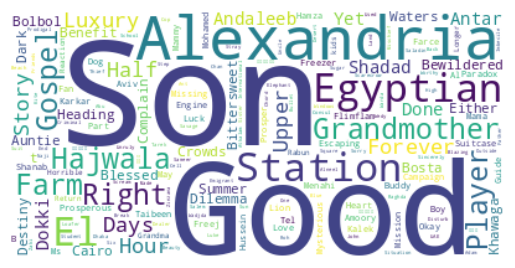


word cloud on listed_in for different cluster
cluster0


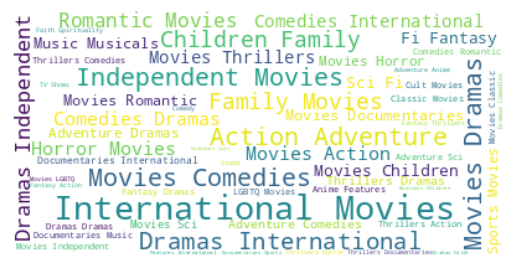


cluster1


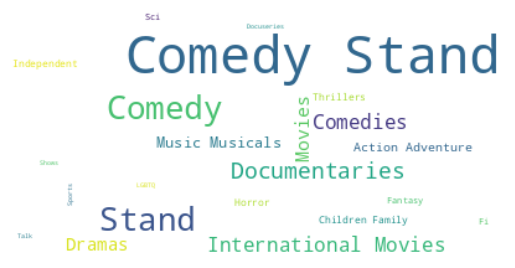


cluster2


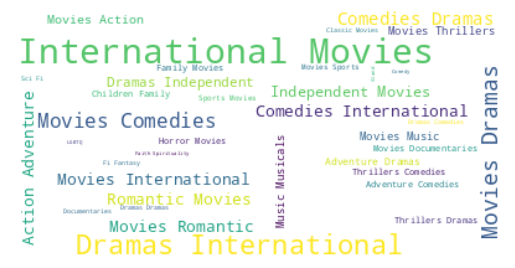


cluster3


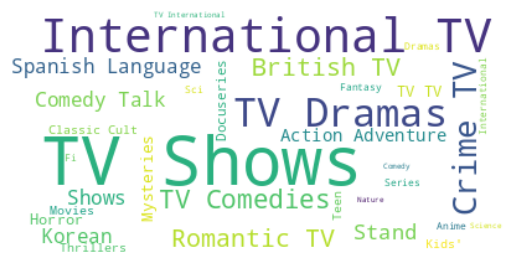


cluster4


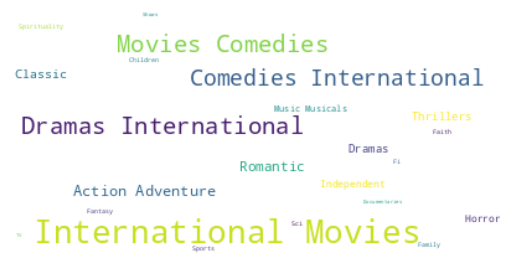


word cloud on cast for different cluster
cluster0


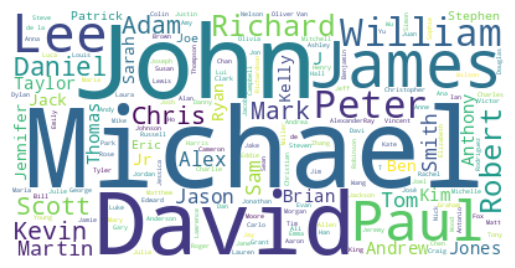


cluster1


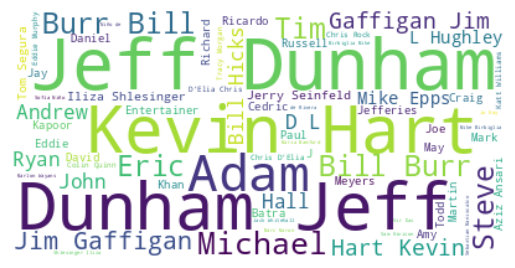


cluster2


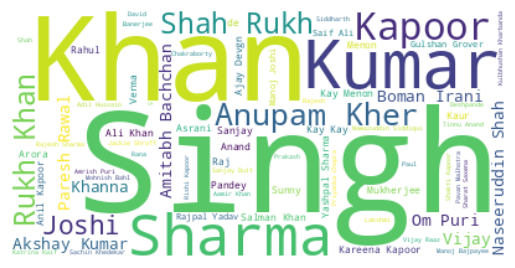


cluster3


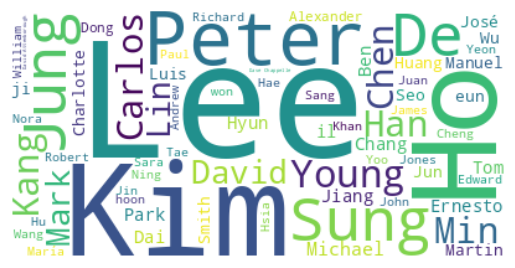


cluster4


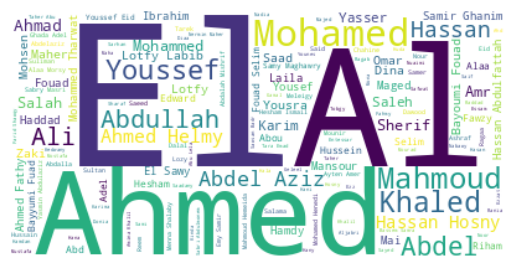


word cloud on country for different cluster
cluster0


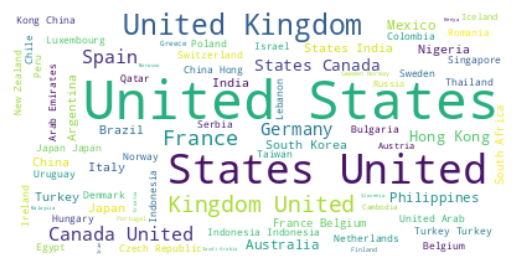


cluster1


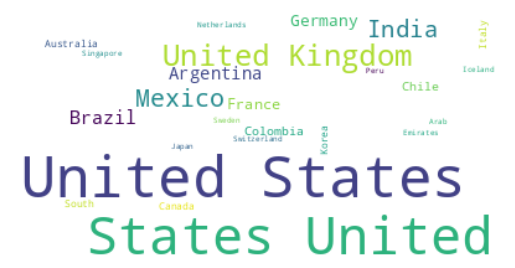


cluster2


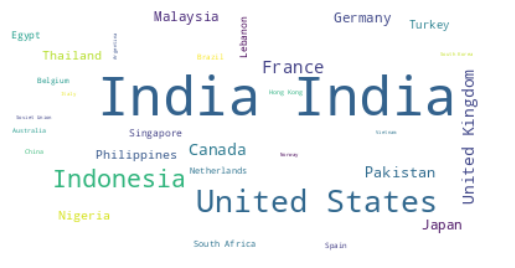


cluster3


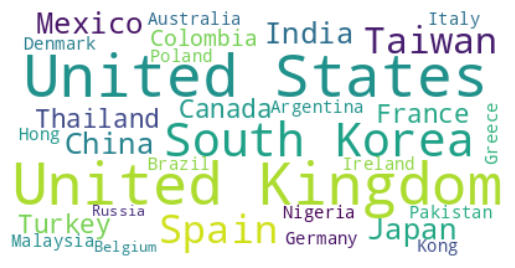


cluster4


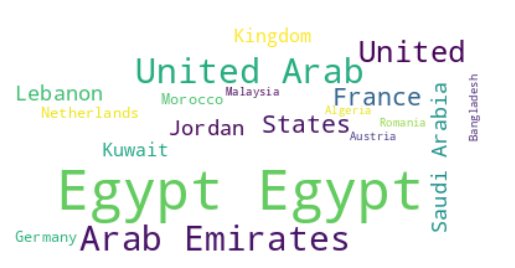


word cloud on director for different cluster
cluster0


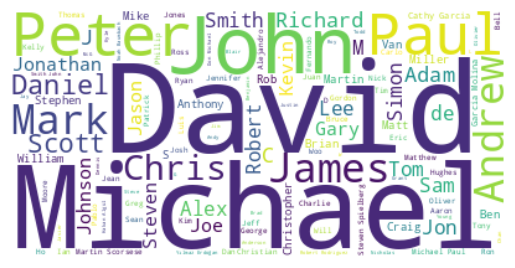


cluster1


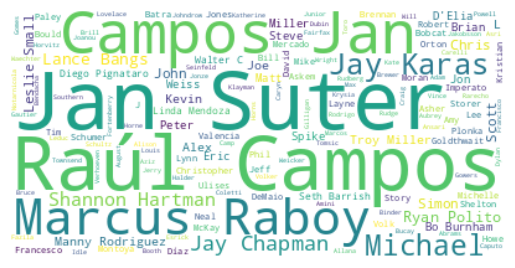


cluster2


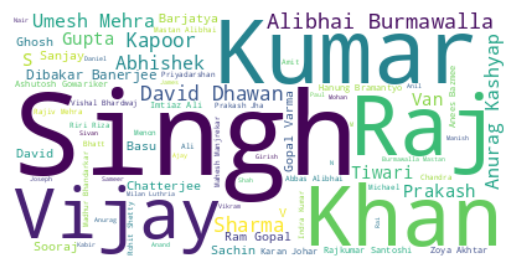


cluster3


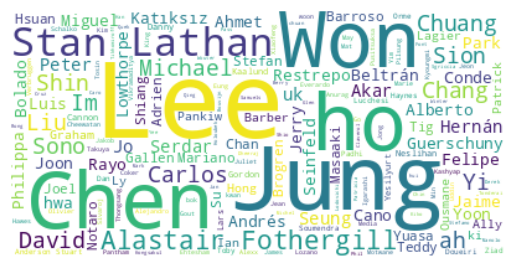


cluster4


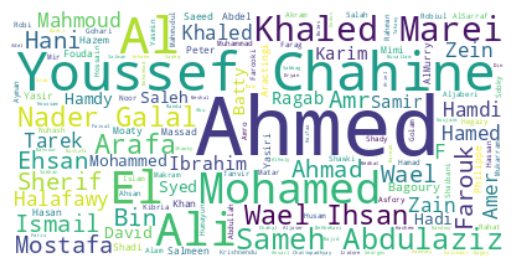

In [ ]:
lst = ['title','listed_in', 'cast','country','director']
for l in lst:
  print(f"word cloud on {l} for different cluster")
  for i in range(5):
    print(f'cluster{i}')
    h_word_cloud(i, l)
    print()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
net_flix[['show_id', 'title', 'text']]

show_id       title                                               text
1         s2        7:19  devastating earthquake hit mexico city trapped...
2         s3       23:59  army recruit found dead fellow soldier forced ...
3         s4           9  postapocalyptic world ragdoll robot hide fear ...
4         s5          21  brilliant group student become cardcounting ex...
5         s6          46  genetics professor experiment treatment comato...
...      ...         ...                                                ...
7778   s7779  Zombieland  looking survive world taken zombie dorky colle...
7780   s7781         Zoo  drug dealer start doubt trade brother client t...
7781   s7782        Zoom  dragged civilian life former superhero must tr...
7782   s7783        Zozo  lebanon civil war deprives zozo family left gr...
7783   s7784      Zubaan  scrappy poor boy worm way tycoon dysfunctional...

[4808 rows x 3 columns]

In [ ]:
recommend_df = net_flix.copy()
recommend_df.reset_index(inplace = True)
recommend_df[['show_id', 'title', 'text']]

show_id       title                                               text
0         s2        7:19  devastating earthquake hit mexico city trapped...
1         s3       23:59  army recruit found dead fellow soldier forced ...
2         s4           9  postapocalyptic world ragdoll robot hide fear ...
3         s5          21  brilliant group student become cardcounting ex...
4         s6          46  genetics professor experiment treatment comato...
...      ...         ...                                                ...
4803   s7779  Zombieland  looking survive world taken zombie dorky colle...
4804   s7781         Zoo  drug dealer start doubt trade brother client t...
4805   s7782        Zoom  dragged civilian life former superhero must tr...
4806   s7783        Zozo  lebanon civil war deprives zozo family left gr...
4807   s7784      Zubaan  scrappy poor boy worm way tycoon dysfunctional...

[4808 rows x 3 columns]

In [ ]:
recommend_df.drop(columns=['index','show_id'], inplace = True)


In [ ]:
X

array([[-0.00287046,  0.00673724, -0.00702606, ..., -0.0098398 ,
         0.00672141,  0.00462235],
       [-0.0210206 , -0.0310808 ,  0.01926812, ...,  0.00320771,
        -0.01054088, -0.00757808],
       [-0.09427361, -0.08036968,  0.01407442, ...,  0.00993979,
        -0.00718533, -0.00451786],
       ...,
       [-0.07033882, -0.04106016, -0.00567622, ..., -0.00204389,
        -0.00439213,  0.00147452],
       [-0.02107602, -0.04629653,  0.00968325, ...,  0.00967616,
        -0.00352721,  0.00853552],
       [ 0.0685414 ,  0.00334886, -0.01869574, ...,  0.00644212,
         0.00260485,  0.00038379]])

In [ ]:
similarity = cosine_similarity(X)
similarity

array([[ 1.00000000e+00, -5.86525158e-03, -1.14930139e-02, ...,
         2.59393868e-03,  4.64880913e-02, -5.87655852e-03],
       [-5.86525158e-03,  1.00000000e+00, -9.39708602e-03, ...,
        -7.34059939e-03, -6.93014878e-03, -5.55877977e-03],
       [-1.14930139e-02, -9.39708602e-03,  1.00000000e+00, ...,
        -9.85255896e-03, -1.43467229e-02,  2.92011962e-02],
       ...,
       [ 2.59393868e-03, -7.34059939e-03, -9.85255896e-03, ...,
         1.00000000e+00, -2.94697515e-03, -2.02094913e-03],
       [ 4.64880913e-02, -6.93014878e-03, -1.43467229e-02, ...,
        -2.94697515e-03,  1.00000000e+00,  1.54508453e-05],
       [-5.87655852e-03, -5.55877977e-03,  2.92011962e-02, ...,
        -2.02094913e-03,  1.54508453e-05,  1.00000000e+00]])

In [ ]:
def recommend(movie):
  print(f'if you liked this movie {movie}, you may also enjoy')
  index = recommend_df[recommend_df['title'] == movie].index[0]
  distances = sorted(list(enumerate(similarity[index])), reverse = True, key = lambda x:x[1])
  for i in distances[1:11]:
    print(net_flix.iloc[i[0]].title)

In [ ]:
recommend('Moonlight')

if you liked this movie Moonlight, you may also enjoy
All Day and a Night
Roxanne Roxanne
Ninja Assassin
The Place Beyond the Pines
Sommore: Chandelier Status
Head On
Barbra: The Music ... The Mem'ries ... The Magic!
Postcards from London
Bushwick
Hunt to Kill


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we tackled a text clustering problem in which we had to categorize and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are not.

There were approximately 7787 records and 11 attributes in the dataset.
We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).
It was discovered that Netflix hosts more movies than television shows on its platform, and the total number of shows added to Netflix is expanding at an exponential rate. Additionally, most of the shows were made in the United States.
The attributes were chosen as the basis for the clustering of the data: cast,genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.
10000 attributes in total were created by TFIDF vectorization. The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA). Because 4000 components were able to account for more than 80% of the variance, the total number of components was limited to 4000.
Utilizing the K-Means Clustering algorithm, we first constructed clusters, and the optimal number of clusters was determined to be 5. The elbow method and Silhouette score analysis were used to get this.
The Agglomerative clustering algorithm was then used to create clusters, and the optimal number of clusters was determined to be 5. This was obtained after visualizing the dendrogram.
The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***